# Variational Inference

In [1]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np

In [2]:
# 目标采样分布的概率密度函数
def p(x):
    return ((0.3 * np.exp(-(x-0.3)**2))+0.7*np.exp(-(x-2.)**2/0.3))/1.2113

In [3]:
samplesize = 500

In [4]:
# q is a Gaussian distribution, p(x) is the above distribution
eps = np.finfo(float).eps

def lossfun(params):
    # 
    u = params[0]
    sigma = params[1]
    
    ss = norm.rvs(loc=u, scale=sigma, size=samplesize) # 从q里面采样
    
    pp1 = p(ss)*0.999 + eps
    #pp1 = norm.pdf(ss, loc=2, scale=3)*0.999 + eps
    
    pp2 = norm.pdf(ss, loc=u, scale=sigma)
    pp2 = pp2*0.999 + eps

    dd = np.log(pp2)-np.log(pp1) # montecarlo的方法
    return dd.sum()/samplesize

In [5]:
res = minimize(fun=lossfun, x0=(1, 1), method='Powell', bounds=((-3, 3), (eps, 3)))
print(res.fun)
print(res.x)

0.17976448420867985
[0.81713966 1.03411431]


Text(0, 0.5, 'pdf(x)')

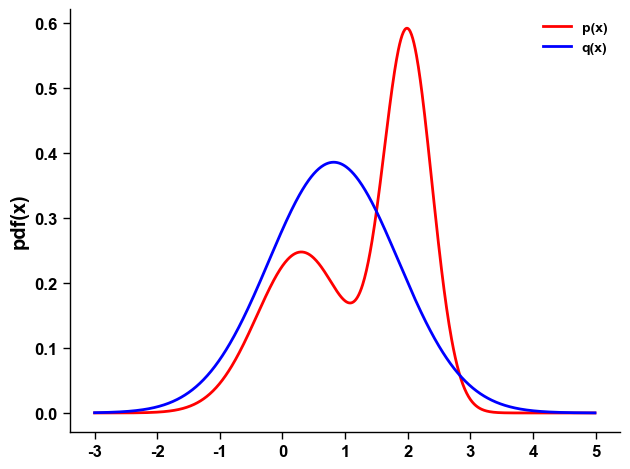

In [6]:
# 完成之后, 我们画出分布
x = np.arange(-3., 5., 0.01)
plt.plot(x, p(x), color='r', label='p(x)')
plt.plot(x, norm.pdf(x,loc=res.x[0], scale=res.x[1]), color='b', label='q(x)')
plt.legend()
plt.ylabel('pdf(x)')